In [1]:
import pandas as pd

df = pd.read_csv("Dataset .csv")   # example: zomato.csv
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
# Check first few rows
df[['Restaurant Name', 'Aggregate rating', 'Rating text']].head()

# Check missing values
df['Rating text'].isnull().sum()


np.int64(0)

In [3]:
df['Rating text'].fillna('', inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_20124\2689111416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating text'].fillna('', inplace=True)


In [4]:
import string

def clean_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    return text

df['Clean_Reviews'] = df['Rating text'].apply(clean_text)


In [5]:
from collections import Counter

all_words = ' '.join(df['Clean_Reviews']).split()
word_counts = Counter(all_words)

# Most common words
print(word_counts.most_common(20))


[('average', 3737), ('good', 3179), ('not', 2148), ('rated', 2148), ('very', 1079), ('excellent', 301), ('poor', 186)]


In [6]:
stopwords = ['the', 'and', 'is', 'a', 'an', 'of', 'to', 'for', 'with', 'in', 'on']
filtered_words = [w for w in all_words if w not in stopwords]
filtered_counts = Counter(filtered_words)
print(filtered_counts.most_common(20))


[('average', 3737), ('good', 3179), ('not', 2148), ('rated', 2148), ('very', 1079), ('excellent', 301), ('poor', 186)]


In [7]:
positive_reviews = df[df['Aggregate rating'] >= 4]['Clean_Reviews']
negative_reviews = df[df['Aggregate rating'] <= 2]['Clean_Reviews']

# Combine text
pos_words = ' '.join(positive_reviews).split()
neg_words = ' '.join(negative_reviews).split()

# Count top words
pos_counts = Counter([w for w in pos_words if w not in stopwords])
neg_counts = Counter([w for w in neg_words if w not in stopwords])

print("Top Positive Keywords:", pos_counts.most_common(10))
print("Top Negative Keywords:", neg_counts.most_common(10))


Top Positive Keywords: [('very', 1079), ('good', 1079), ('excellent', 301)]
Top Negative Keywords: [('not', 2148), ('rated', 2148), ('poor', 10)]


In [9]:
df['Review_Length'] = df['Clean_Reviews'].apply(lambda x: len(x.split()))
avg_length = df['Review_Length'].mean()
print("Average review length:", round(avg_length,2))


Average review length: 1.34


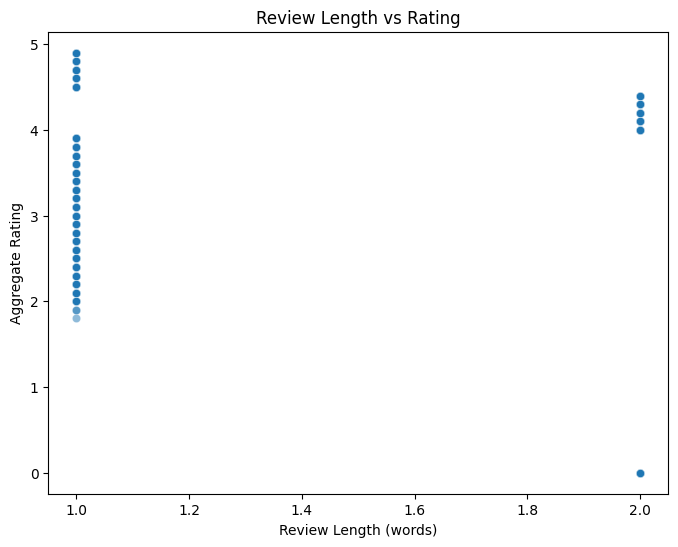

Correlation between review length and rating: -0.6


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='Review_Length', y='Aggregate rating', data=df, alpha=0.5)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Aggregate Rating')
plt.show()

# Optional: correlation
correlation = df['Review_Length'].corr(df['Aggregate rating'])
print("Correlation between review length and rating:", round(correlation,2))


In [12]:
!pip install wordcloud seaborn matplotlib



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import wordcloud
import seaborn as sns
import matplotlib.pyplot as plt

print("Modules installed successfully!")


Modules installed successfully!


In [14]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd

# Assuming your DataFrame is df and has 'Aggregate rating' & 'Rating text'
df['Rating text'].fillna('', inplace=True)  # handle missing reviews

# Clean text function
import string
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['Clean_Reviews'] = df['Rating text'].apply(clean_text)

# Separate positive and negative reviews
positive_reviews = df[df['Aggregate rating'] >= 4]['Clean_Reviews']
negative_reviews = df[df['Aggregate rating'] <= 2]['Clean_Reviews']

# Combine all reviews into one string each
pos_text = ' '.join(positive_reviews)
neg_text = ' '.join(negative_reviews)


C:\Users\HP\AppData\Local\Temp\ipykernel_20124\3661493544.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating text'].fillna('', inplace=True)  # handle missing reviews


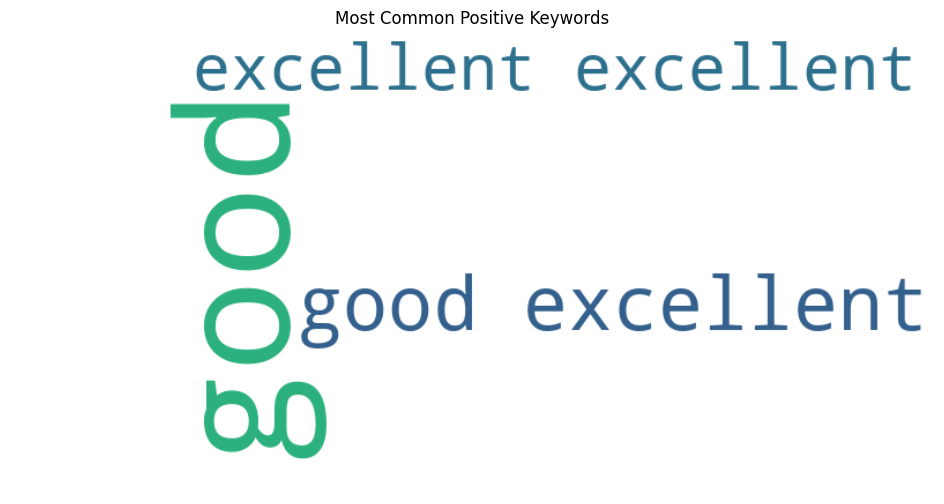

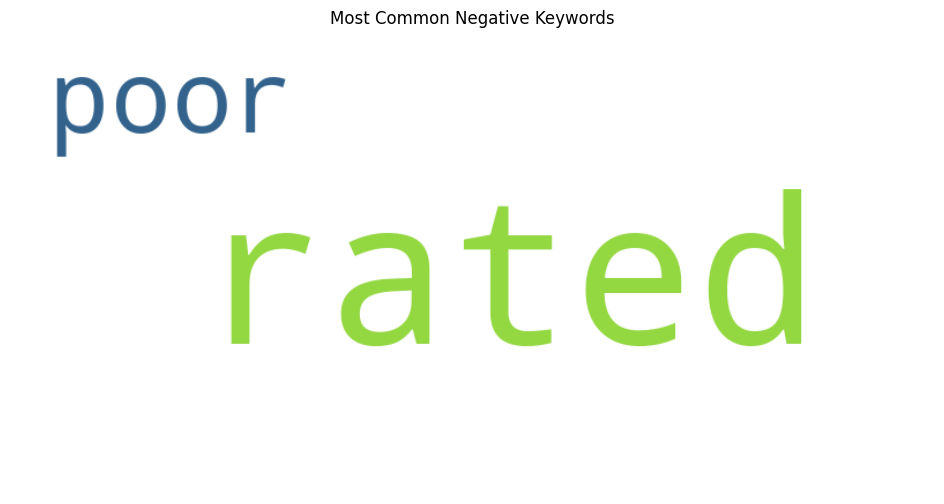

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positive Reviews WordCloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Positive Keywords')
plt.show()

# Negative Reviews WordCloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(neg_text)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Negative Keywords')
plt.show()


In [18]:
stopwords = set(['the', 'and', 'is', 'a', 'an', 'of', 'to', 'for', 'with', 'in', 'on'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(neg_text)
